## Loading Data

In [7]:
import pandas as pd


df = pd.read_csv("datasets/f1_stats.csv")

df

,n,Piloto,Nb,Moy/GP
0,1,HAMILTON Lewis,4971.5,13.44
1,2,VERSTAPPEN Max,3210.5,14.40
2,3,VETTEL Sebastian,3098.0,10.36
3,4,ALONSO Fernando,2363.0,5.69
4,5,RAIKKONEN Kimi,1873.0,5.37
...,...,...,...,...
351,352,WILSON Justin,1.0,0.06
352,353,BAUMGARTNER Zsolt,1.0,0.05
353,354,SIROTKIN Sergey,1.0,0.05
354,355,SARGEANT Logan,1.0,0.03


## Data Analysis

In [8]:
# Total of lines
print(df["n"].count())

356


In [9]:
# Mean points
mean_points = df["Nb"].mean()

print(f"Mean Points: {mean_points:.2f}.")

Mean Points: 155.24.


In [10]:
# Mean points per GP
mean_points_per_gp = df["Moy/GP"].mean()

print(f"Mean Points per GP: {mean_points_per_gp:.2f}.")

Mean Points per GP: 1.31.


In [11]:
# Get the top five pilots with most points
top_five_drivers_most_points = df.groupby("Piloto")["Nb"].max().nlargest(5)
i = 0

for driver, points in top_five_drivers_most_points.items():
    print(f" {i + 1} - {driver.split()[0]} : {points}")
    i += 1

 1 - HAMILTON : 4971.5
 2 - VERSTAPPEN : 3210.5
 3 - VETTEL : 3098.0
 4 - ALONSO : 2363.0
 5 - RAIKKONEN : 1873.0


In [12]:
# Get the sum of the top five
top_five_pilots = sum(top_five_drivers_most_points.values)
rest_pilots = sum(df["Nb"][5:])

values = [top_five_pilots] + [rest_pilots]

print(sum(values))

55265.97


## Charts on the top five drivers with most points

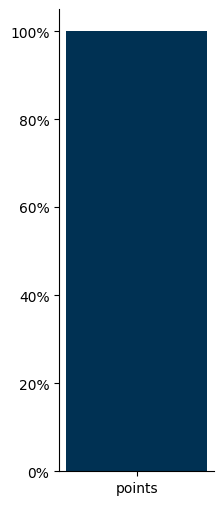

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


# Figure and axis
fig, ax = plt.subplots(figsize=(2, 6))

# Variables
five_perc = [top_five_pilots / sum(values)]
rest_perc = [rest_pilots / sum(values)]
x = "points"

# Ploting
plt.bar(x, five_perc, color="#003153")
plt.bar(x, rest_perc, bottom=five_perc, color="#003153")

# Formatting the y-axis
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Remove the borders
ax.spines[["top", "right"]].set_visible(False)

# Show
plt.show()

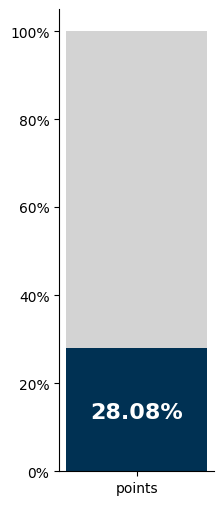

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


# Figure and axis
fig, ax = plt.subplots(figsize=(2, 6))

# Variables
five_perc = [top_five_pilots / sum(values)]
rest_perc = [rest_pilots / sum(values)]
x = "points"

# Ploting
plt.bar(x, five_perc, color="#003153")
plt.bar(x, rest_perc, bottom=five_perc, color="lightgray")

# Formatting the y-axis
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Adding the percentage
p = ax.patches[0]
height = p.get_height()
ax.text(
    p.get_x() + p.get_width() / 2,  
    height - 0.17,                  
    f'{height:.2%}',
    color="white",
    fontsize = 16,
    fontweight="bold",
    ha='center', 
    va='bottom'
)

# Remove the borders
ax.spines[["top", "right"]].set_visible(False)

# Show
plt.show()

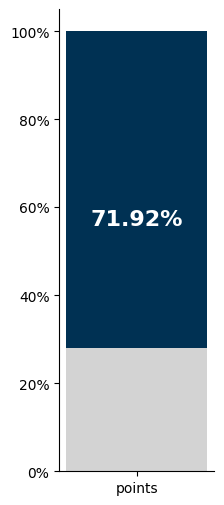

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


# Figure and axis
fig, ax = plt.subplots(figsize=(2, 6))

# Variables
five_perc = [top_five_pilots / sum(values)]
rest_perc = [rest_pilots / sum(values)]
x = "points"

# Ploting
plt.bar(x, five_perc, color="lightgray")
plt.bar(x, rest_perc, bottom=five_perc, color="#003153")

# Formatting the y-axis
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Adding the percentage
p = ax.patches[1]
height = p.get_height()
ax.text(
    p.get_x() + p.get_width() / 2,  
    height - 0.17,                  
    f'{height:.2%}',
    color="white",
    fontsize = 16,
    fontweight="bold",
    ha='center', 
    va='bottom'
)

# Remove the borders
ax.spines[["top", "right"]].set_visible(False)

# Show
plt.show()

## First Breakdown

The top five drivers with most points account for more than a quarter of the total points. These top five drivers are: Hamilton, Verstappen, Vettel, Alonso and Raikkonen. All of them are Formula 1 World Champions at least.

In [16]:
df

,n,Piloto,Nb,Moy/GP
0,1,HAMILTON Lewis,4971.5,13.44
1,2,VERSTAPPEN Max,3210.5,14.40
2,3,VETTEL Sebastian,3098.0,10.36
3,4,ALONSO Fernando,2363.0,5.69
4,5,RAIKKONEN Kimi,1873.0,5.37
...,...,...,...,...
351,352,WILSON Justin,1.0,0.06
352,353,BAUMGARTNER Zsolt,1.0,0.05
353,354,SIROTKIN Sergey,1.0,0.05
354,355,SARGEANT Logan,1.0,0.03


In [17]:
import numpy as np


df["GPs"] = np.round(df["Nb"] / df["Moy/GP"], 0)

df

,n,Piloto,Nb,Moy/GP,GPs
0,1,HAMILTON Lewis,4971.5,13.44,370.0
1,2,VERSTAPPEN Max,3210.5,14.40,223.0
2,3,VETTEL Sebastian,3098.0,10.36,299.0
3,4,ALONSO Fernando,2363.0,5.69,415.0
4,5,RAIKKONEN Kimi,1873.0,5.37,349.0
...,...,...,...,...,...
351,352,WILSON Justin,1.0,0.06,17.0
352,353,BAUMGARTNER Zsolt,1.0,0.05,20.0
353,354,SIROTKIN Sergey,1.0,0.05,20.0
354,355,SARGEANT Logan,1.0,0.03,33.0


In [18]:
top_5_drivers_by_gps = df.groupby("Piloto")["GPs"].max().nlargest(5)

top_5_drivers_by_gps

Piloto
ALONSO Fernando       415.0
HAMILTON Lewis        370.0
RAIKKONEN Kimi        349.0
BARRICHELLO Rubens    323.0
SCHUMACHER Michael    307.0
Name: GPs, dtype: float64

In [19]:
top_least_5_drivers_by_gps = df.groupby("Piloto")["GPs"].min().nsmallest(5)

top_least_5_drivers_by_gps

Piloto
AMICK George       1.0
CHITWOOD Joie      1.0
GALVEZ Oscar       1.0
LEDERLE Neville    1.0
SERAFINI Dorino    1.0
Name: GPs, dtype: float64

In [20]:
drivers = [x.split()[0] for x in top_5_drivers_by_gps.index][::-1]
gps = top_5_drivers_by_gps.values[::-1]

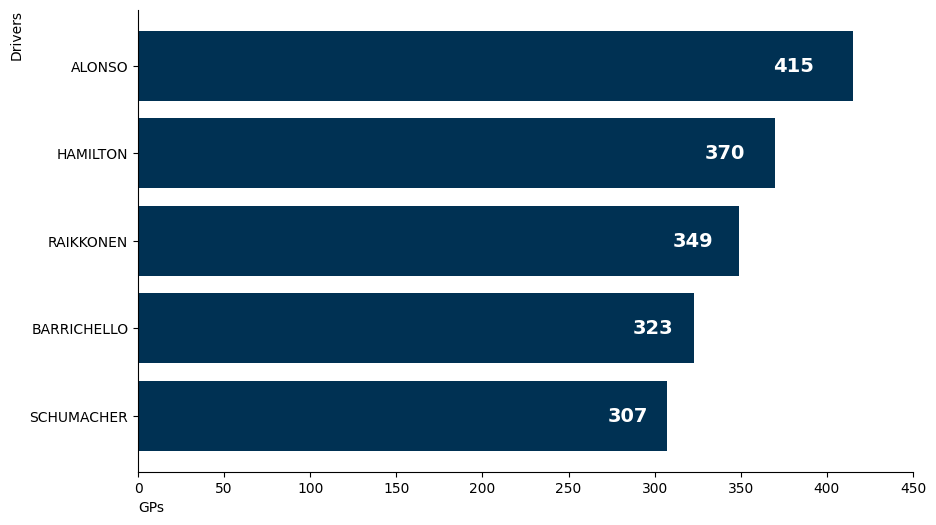

In [21]:
# Figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Variables
drivers = drivers
gps = gps

# Ploting
bars = plt.barh(drivers, gps, color="#003153")

# Set a limit x-axis
ax.set_xlim(0, 450)

# Set a data label
for i, v in enumerate(gps):
    ax.text(v/1.125, i, f"{v:.0f}", fontweight="bold", fontsize=14, color="white", va="center")

# Set a name in axis
ax.set_ylabel("Drivers", loc="top")
ax.set_xlabel("GPs", loc="left")

# Remove the borders
ax.spines[["top", "right"]].set_visible(False)

# Show
plt.show()

## Second Breakdown

The top five drivers with the most Grands Prix appearances, three of whom also have the most points. Alonso, Hamilton, and Raikkonen are longtime F1 figures, but they've continued to impress over time. Furthermore, two other impressive figures are Schumacher and Barrichello, both teammates at Ferrari, even though one of them has stood out more than the other, it is still impressive. 

In [22]:
top_five_points_per_gp = df.groupby("Piloto")["Moy/GP"].max().nlargest(5)

top_five_points_per_gp

Piloto
VERSTAPPEN Max      14.40
HAMILTON Lewis      13.44
PIASTRI Oscar       11.22
VETTEL Sebastian    10.36
LECLERC Charles      9.82
Name: Moy/GP, dtype: float64

In [23]:
drivers = [y.split()[0] for y in top_five_points_per_gp.index][::-1]
points_gp = top_five_points_per_gp.values[::-1]

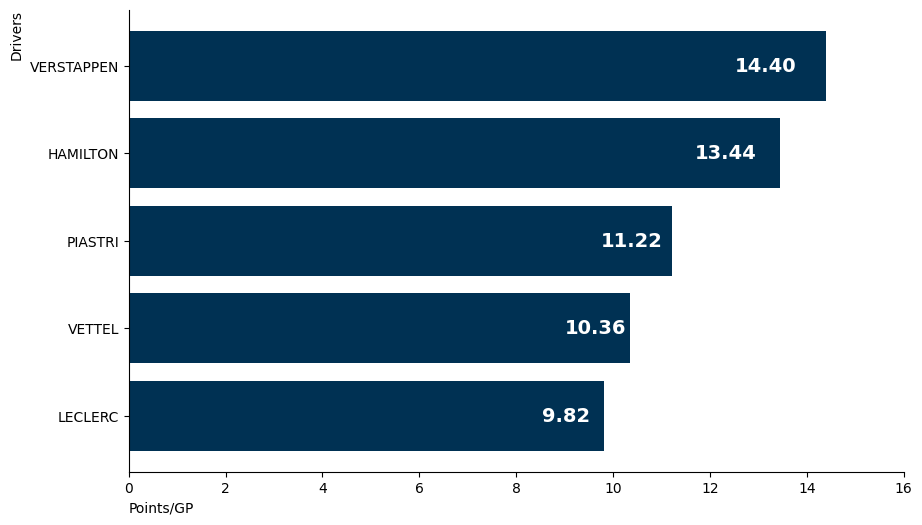

In [24]:
# Figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Variables
drivers = drivers
points_gp = points_gp

# Ploting
bars = plt.barh(drivers, points_gp, color="#003153") 

# Set a limit x-axis
ax.set_xlim(0, 16)

# Set a data label
for i, v in enumerate(points_gp):
    ax.text(v/1.15, i, f"{v:.2f}", fontweight="bold", fontsize=14, color="white", va="center")

# Set a name in axis
ax.set_ylabel("Drivers", loc="top")
ax.set_xlabel("Points/GP", loc="left")

# Remove the borders
ax.spines[["top", "right"]].set_visible(False)

# Show
plt.show()

## Third Breakdown

The five drivers with most points per GP include two previously mentioned figures: Hamilton and Verstappen. These drivers are truly renowned figures in the motorsport category and in statistical data.

In [25]:
df_2 = pd.read_csv("datasets/wins_gp.csv")

df_2

,Unnamed: 0,n,Piloto,Nb,%/Nb GP
0,0,1,HAMILTON Lewis,105,28.38
1,1,2,SCHUMACHER Michael,91,29.64
2,2,3,VERSTAPPEN Max,65,29.15
3,3,4,VETTEL Sebastian,53,17.73
4,4,5,PROST Alain,51,25.63
...,...,...,...,...,...
110,110,111,KUBICA Robert,1,1.01
111,111,112,KOVALAINEN Heikki,1,0.90
112,112,113,MALDONADO Pastor,1,1.05
113,113,114,GASLY Pierre,1,0.60


In [26]:
df_2 = df_2.rename(columns={'Nb': 'Wins'})
df_2 = df_2.rename(columns={"%/Nb GP":  "%Wins"})

df_2

,Unnamed: 0,n,Piloto,Wins,%Wins
0,0,1,HAMILTON Lewis,105,28.38
1,1,2,SCHUMACHER Michael,91,29.64
2,2,3,VERSTAPPEN Max,65,29.15
3,3,4,VETTEL Sebastian,53,17.73
4,4,5,PROST Alain,51,25.63
...,...,...,...,...,...
110,110,111,KUBICA Robert,1,1.01
111,111,112,KOVALAINEN Heikki,1,0.90
112,112,113,MALDONADO Pastor,1,1.05
113,113,114,GASLY Pierre,1,0.60


In [27]:
df_2.dtypes

Unnamed: 0      int64
n               int64
Piloto         object
Wins            int64
%Wins         float64
dtype: object

In [28]:
df = df.merge(df_2, on="Piloto", how="left")

df

,n_x,Piloto,Nb,Moy/GP,GPs,Unnamed: 0,n_y,Wins,%Wins
0,1,HAMILTON Lewis,4971.5,13.44,370.0,0.0,1.0,105.0,28.38
1,2,VERSTAPPEN Max,3210.5,14.40,223.0,2.0,3.0,65.0,29.15
2,3,VETTEL Sebastian,3098.0,10.36,299.0,3.0,4.0,53.0,17.73
3,4,ALONSO Fernando,2363.0,5.69,415.0,6.0,7.0,32.0,7.71
4,5,RAIKKONEN Kimi,1873.0,5.37,349.0,15.0,16.0,21.0,6.02
...,...,...,...,...,...,...,...,...,...
351,352,WILSON Justin,1.0,0.06,17.0,NaN,NaN,NaN,NaN
352,353,BAUMGARTNER Zsolt,1.0,0.05,20.0,NaN,NaN,NaN,NaN
353,354,SIROTKIN Sergey,1.0,0.05,20.0,NaN,NaN,NaN,NaN
354,355,SARGEANT Logan,1.0,0.03,33.0,NaN,NaN,NaN,NaN


In [29]:
df = df.drop(["Unnamed: 0", "n_y"], axis=1)

df

,n_x,Piloto,Nb,Moy/GP,GPs,Wins,%Wins
0,1,HAMILTON Lewis,4971.5,13.44,370.0,105.0,28.38
1,2,VERSTAPPEN Max,3210.5,14.40,223.0,65.0,29.15
2,3,VETTEL Sebastian,3098.0,10.36,299.0,53.0,17.73
3,4,ALONSO Fernando,2363.0,5.69,415.0,32.0,7.71
4,5,RAIKKONEN Kimi,1873.0,5.37,349.0,21.0,6.02
...,...,...,...,...,...,...,...
351,352,WILSON Justin,1.0,0.06,17.0,NaN,NaN
352,353,BAUMGARTNER Zsolt,1.0,0.05,20.0,NaN,NaN
353,354,SIROTKIN Sergey,1.0,0.05,20.0,NaN,NaN
354,355,SARGEANT Logan,1.0,0.03,33.0,NaN,NaN


In [30]:
df["Wins"] = [float(w) for w in df["Wins"].values]

df

,n_x,Piloto,Nb,Moy/GP,GPs,Wins,%Wins
0,1,HAMILTON Lewis,4971.5,13.44,370.0,105.0,28.38
1,2,VERSTAPPEN Max,3210.5,14.40,223.0,65.0,29.15
2,3,VETTEL Sebastian,3098.0,10.36,299.0,53.0,17.73
3,4,ALONSO Fernando,2363.0,5.69,415.0,32.0,7.71
4,5,RAIKKONEN Kimi,1873.0,5.37,349.0,21.0,6.02
...,...,...,...,...,...,...,...
351,352,WILSON Justin,1.0,0.06,17.0,NaN,NaN
352,353,BAUMGARTNER Zsolt,1.0,0.05,20.0,NaN,NaN
353,354,SIROTKIN Sergey,1.0,0.05,20.0,NaN,NaN
354,355,SARGEANT Logan,1.0,0.03,33.0,NaN,NaN


In [31]:
df["Wins"] = df["Wins"].fillna(0)
df["%Wins"] = df["%Wins"].fillna(0)

df

,n_x,Piloto,Nb,Moy/GP,GPs,Wins,%Wins
0,1,HAMILTON Lewis,4971.5,13.44,370.0,105.0,28.38
1,2,VERSTAPPEN Max,3210.5,14.40,223.0,65.0,29.15
2,3,VETTEL Sebastian,3098.0,10.36,299.0,53.0,17.73
3,4,ALONSO Fernando,2363.0,5.69,415.0,32.0,7.71
4,5,RAIKKONEN Kimi,1873.0,5.37,349.0,21.0,6.02
...,...,...,...,...,...,...,...
351,352,WILSON Justin,1.0,0.06,17.0,0.0,0.00
352,353,BAUMGARTNER Zsolt,1.0,0.05,20.0,0.0,0.00
353,354,SIROTKIN Sergey,1.0,0.05,20.0,0.0,0.00
354,355,SARGEANT Logan,1.0,0.03,33.0,0.0,0.00


In [32]:
df_3 = pd.read_csv("datasets/pole_positions.csv")

df_3

,Unnamed: 0,n,Piloto,Pole_Positions,Pole_Positions/GP
0,0,1,HAMILTON Lewis,104,28.11
1,1,2,SCHUMACHER Michael,68,22.08
2,2,3,SENNA Ayrton,65,40.37
3,3,4,VETTEL Sebastian,57,19.00
4,4,5,VERSTAPPEN Max,44,19.73
...,...,...,...,...,...
102,102,103,KOVALAINEN Heikki,1,0.89
103,103,104,HULKENBERG Nico,1,0.41
104,104,105,MALDONADO Pastor,1,1.04
105,105,106,STROLL Lance,1,0.55


In [33]:
df["Pole_Positions"] = df_3["Pole_Positions"]
df["Pole_Positions/GP"] = df_3["Pole_Positions/GP"]

df["Pole_Positions"] = df["Pole_Positions"].fillna(0)
df["Pole_Positions/GP"] = df["Pole_Positions/GP"].fillna(0)

df

,n_x,Piloto,Nb,Moy/GP,GPs,Wins,%Wins,Pole_Positions,Pole_Positions/GP
0,1,HAMILTON Lewis,4971.5,13.44,370.0,105.0,28.38,104.0,28.11
1,2,VERSTAPPEN Max,3210.5,14.40,223.0,65.0,29.15,68.0,22.08
2,3,VETTEL Sebastian,3098.0,10.36,299.0,53.0,17.73,65.0,40.37
3,4,ALONSO Fernando,2363.0,5.69,415.0,32.0,7.71,57.0,19.00
4,5,RAIKKONEN Kimi,1873.0,5.37,349.0,21.0,6.02,44.0,19.73
...,...,...,...,...,...,...,...,...,...
351,352,WILSON Justin,1.0,0.06,17.0,0.0,0.00,0.0,0.00
352,353,BAUMGARTNER Zsolt,1.0,0.05,20.0,0.0,0.00,0.0,0.00
353,354,SIROTKIN Sergey,1.0,0.05,20.0,0.0,0.00,0.0,0.00
354,355,SARGEANT Logan,1.0,0.03,33.0,0.0,0.00,0.0,0.00


In [34]:
df_4 = pd.read_csv("datasets/podiums.csv")

df["Podiums"] = df_4["Podiums"]
df["Podiums/GP"] = df_4["%Podiums_GP"]

df["Podiums"] = df["Podiums"].fillna(0)
df["Podiums/GP"] = df["Podiums/GP"].fillna(0)

df

,n_x,Piloto,Nb,Moy/GP,GPs,Wins,%Wins,Pole_Positions,Pole_Positions/GP,Podiums,Podiums/GP
0,1,HAMILTON Lewis,4971.5,13.44,370.0,105.0,28.38,104.0,28.11,202.0,54.59
1,2,VERSTAPPEN Max,3210.5,14.40,223.0,65.0,29.15,68.0,22.08,155.0,50.49
2,3,VETTEL Sebastian,3098.0,10.36,299.0,53.0,17.73,65.0,40.37,122.0,40.80
3,4,ALONSO Fernando,2363.0,5.69,415.0,32.0,7.71,57.0,19.00,117.0,52.47
4,5,RAIKKONEN Kimi,1873.0,5.37,349.0,21.0,6.02,44.0,19.73,106.0,53.27
...,...,...,...,...,...,...,...,...,...,...,...
351,352,WILSON Justin,1.0,0.06,17.0,0.0,0.00,0.0,0.00,0.0,0.00
352,353,BAUMGARTNER Zsolt,1.0,0.05,20.0,0.0,0.00,0.0,0.00,0.0,0.00
353,354,SIROTKIN Sergey,1.0,0.05,20.0,0.0,0.00,0.0,0.00,0.0,0.00
354,355,SARGEANT Logan,1.0,0.03,33.0,0.0,0.00,0.0,0.00,0.0,0.00


In [35]:
top_five_drivers_most_podiums = df.groupby("Piloto")["Podiums"].max().nlargest(5)

top_five_drivers_most_podiums

Piloto
HAMILTON Lewis      202.0
VERSTAPPEN Max      155.0
VETTEL Sebastian    122.0
ALONSO Fernando     117.0
BOTTAS Valtteri     106.0
Name: Podiums, dtype: float64

In [36]:
drivers = top_five_drivers_most_podiums.index[::-1]
podiums = top_five_drivers_most_podiums.values[::-1]

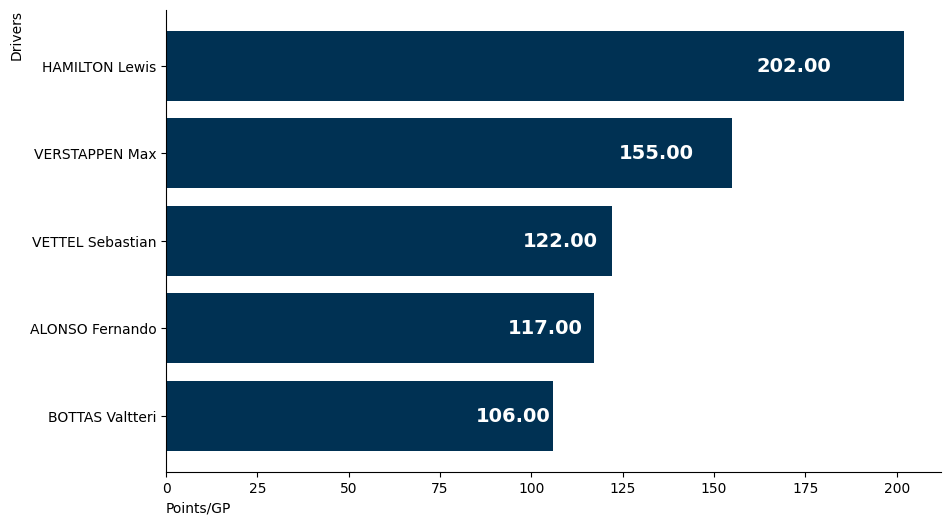

In [37]:
# Figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Variables
drivers = drivers
podiums = podiums

# Ploting
bars = plt.barh(drivers, podiums, color="#003153") 

'''
# Set a limit x-axis
ax.set_xlim(0, 16)
'''

# Set a data label
for i, v in enumerate(podiums):
    ax.text(v/1.25, i, f"{v:.2f}", fontweight="bold", fontsize=14, color="white", va="center")

# Set a name in axis
ax.set_ylabel("Drivers", loc="top")
ax.set_xlabel("Points/GP", loc="left")

# Remove the borders
ax.spines[["top", "right"]].set_visible(False)

# Show
plt.show()

## Fourth Breakdown

When we look at the top five drivers with the most podiums, previously mentioned drivers reappear. Among them: Alonso, Verstappen, Hamilton, and Vettel.

In [38]:
norm_points = (df["Nb"] - df["Nb"].min()) / (df["Nb"].max() - df["Nb"].min()) 
norm_gps = (df["GPs"] - df["GPs"].min()) / (df["GPs"].max() - df["GPs"].min())
norm_points_gp = (df["Moy/GP"] - df["Moy/GP"].min()) / (df["Moy/GP"].max() - df["Moy/GP"].min())
norm_wins_gp = ((df["Wins"] - df["Wins"].min()) / (df["Wins"].max() - df["Wins"].min()))
norm_pole_positions = ((df["Pole_Positions"] - df["Pole_Positions"].min()) / (df["Pole_Positions"].max() - df["Pole_Positions"].min()))
norm_podiums = ((df["Podiums"] - df["Podiums"].min()) / (df["Podiums"].max() - df["Podiums"].min()))

In [39]:
driver_performance_index = ((norm_points * 0.16) + (norm_gps * 0.16) + (norm_points_gp * 0.16) + 
                            (norm_wins_gp * 0.16) + (norm_pole_positions * 0.16) + (norm_podiums * 0.16))

driver_performance_index

0      0.931927
1      0.675552
2      0.607312
3      0.528256
4      0.437942
         ...   
351    0.006645
352    0.007693
353    0.007693
354    0.012495
355    0.004474
Length: 356, dtype: float64

In [40]:
df["DPI"] = driver_performance_index

df

,n_x,Piloto,Nb,Moy/GP,GPs,Wins,%Wins,Pole_Positions,Pole_Positions/GP,Podiums,Podiums/GP,DPI
0,1,HAMILTON Lewis,4971.5,13.44,370.0,105.0,28.38,104.0,28.11,202.0,54.59,0.931927
1,2,VERSTAPPEN Max,3210.5,14.40,223.0,65.0,29.15,68.0,22.08,155.0,50.49,0.675552
2,3,VETTEL Sebastian,3098.0,10.36,299.0,53.0,17.73,65.0,40.37,122.0,40.80,0.607312
3,4,ALONSO Fernando,2363.0,5.69,415.0,32.0,7.71,57.0,19.00,117.0,52.47,0.528256
4,5,RAIKKONEN Kimi,1873.0,5.37,349.0,21.0,6.02,44.0,19.73,106.0,53.27,0.437942
...,...,...,...,...,...,...,...,...,...,...,...,...
351,352,WILSON Justin,1.0,0.06,17.0,0.0,0.00,0.0,0.00,0.0,0.00,0.006645
352,353,BAUMGARTNER Zsolt,1.0,0.05,20.0,0.0,0.00,0.0,0.00,0.0,0.00,0.007693
353,354,SIROTKIN Sergey,1.0,0.05,20.0,0.0,0.00,0.0,0.00,0.0,0.00,0.007693
354,355,SARGEANT Logan,1.0,0.03,33.0,0.0,0.00,0.0,0.00,0.0,0.00,0.012495


In [41]:
top_five_dpi_drivers = df.groupby("Piloto")["DPI"].max().nlargest(5)

top_five_dpi_drivers

Piloto
HAMILTON Lewis        0.931927
VERSTAPPEN Max        0.675552
VETTEL Sebastian      0.607312
ALONSO Fernando       0.528256
SCHUMACHER Michael    0.461523
Name: DPI, dtype: float64

In [42]:
drivers = [d.split()[0] for d in top_five_dpi_drivers.index]
dpi = top_five_dpi_drivers.values.round(2)

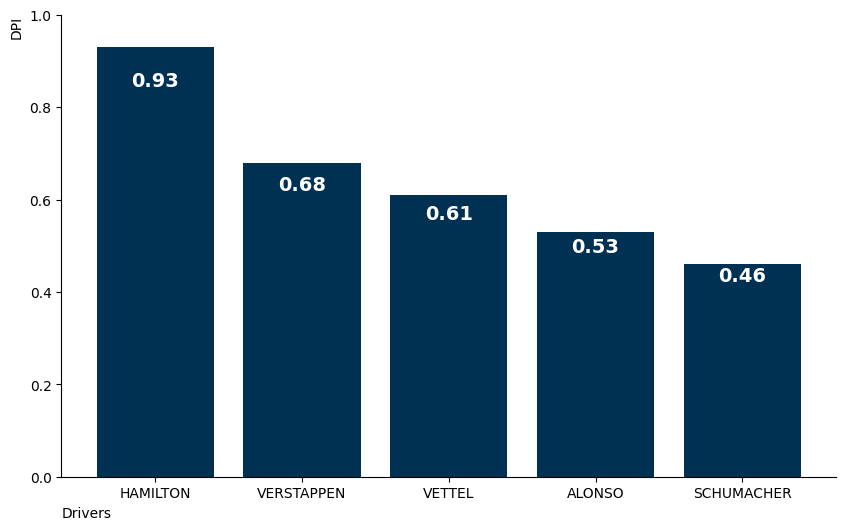

In [44]:
# Figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Variables
drivers = drivers
dpi = dpi

# Ploting
bars = plt.bar(drivers, dpi, color="#003153")

# Set a data label
for bar in bars:
    height = bar.get_height() 
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height * 0.90,
        f"{height}",
        ha="center", va="bottom",
        fontsize=14, color="white",
        fontweight="bold"
    )

# Set a name in axis
ax.set_ylabel("DPI", loc="top")
ax.set_xlabel("Drivers", loc="left")

# Set a limit in y-axis
ax.set_ylim(0, 1)

# Remove the borders
ax.spines[["top", "right"]].set_visible(False)

# Show
plt.show()

## Final Breakdown

When we put the data into a formula to calculate the DPI (Driver Performance Index), we discover the same familiar faces from the F1 category: Hamilton, Verstappen, Vettel, Schumacher and Alonso.